In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data from CSV
data = pd.read_csv('data/house_prices.csv')
data



,Size,Price
0,1500,300
1,1700,350
2,1800,360
3,2000,400
4,2100,420
5,2300,460
6,2500,500
7,2700,540
8,3000,600
9,3500,700


In [11]:
# Step 2: Define features (X) and target (y)
X = data[['Size']]  # Needs to be 2D for sklearn # if have more variables: X = data[['size', 'bedrooms']]
y = data['Price']   # Target vector (what I want to predict)

print(X)
print('')
print(y)

   Size
0  1500
1  1700
2  1800
3  2000
4  2100
5  2300
6  2500
7  2700
8  3000
9  3500

0    300
1    350
2    360
3    400
4    420
5    460
6    500
7    540
8    600
9    700
Name: Price, dtype: int64


In [12]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# test_size=0.2  sets the split in a way that 20% of the data will go to test variables, else 80% for training variables.
# random_state=42 sets an specific seed for Randomness, thus every time I run the code, the same items will end up into the same 20% or 80%

#Then (X_train, y_train) is used to train the model, and (X_test, y_test) to test its performance. In that way, test data will be new data that the model haven't seen before, allowing actually make predictions and not give memorized answers

X_test




,Size
8,3000
1,1700


In [13]:
# Step 4: Train the Linear Regression Model
model = LinearRegression() #this an object ' model' from the class 'LinearRegression' 
model.fit(X_train, y_train) #this train our model, so it can determine the best-fitting line (by calculating the slope and intercept) that minimizes the error

print(model)

LinearRegression()


In [14]:
# Step 5: Evaluate the Model
y_pred = model.predict(X_test) #returns the predicted targets (prices) for each (x_test) variable (sizes)
mse = mean_squared_error(y_test, y_pred) #returns the average squared difference between the actual prices (y_test) and the predicted prices (y_pred).
#Why the avarage squared?
#1 Squaring makes larger errors more significant than smaller ones, penalizing predictions that are far from the true values more heavily.

r2 = r2_score(y_test, y_pred) 
# The R² score indicates how much of the variability (difference between each price) in (y_test) is explained by the models predictions (y_pred).
# It ranges from 0 to 1, where 1 means the model explains 100% of the variability in (y_test), and 0 means the model explains none of the variability, making predictions no better than the average of (y_test).
 
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 50.00000000000057
R² Score: 0.9967999999999999


In [15]:
# Step 6: Make Predictions
new_house_size = pd.DataFrame([[2800]], columns=['Size']) 
#The DataFrame format for the value to predict is necessary because the predict() method expects input in this format (a 2D array).
# I is also necessary because the model expect an input value into a column called "Size", which I set up at the beginnig.
predicted_price = model.predict(new_house_size) #returns the predicted targets (prices) for each value to predict 'new_house_size' values.
print(f"Predicted Price for a {new_house_size.loc[0, 'Size']} sqft house: {predicted_price[0]}")



Predicted Price for a 2800 sqft house: 560.0


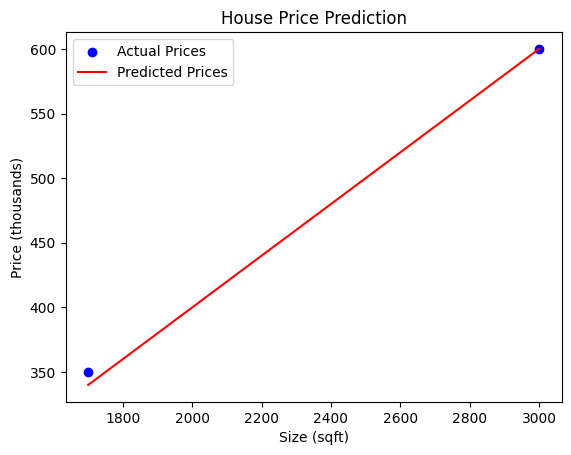

In [16]:
# Optional: Visualization of the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (thousands)')
plt.title('House Price Prediction')
plt.legend()
plt.show()